# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 4.4: Convolução 2D - Filtrando imagens

In [1]:
import math as m
import time
import numpy as np
import scipy.signal as sig
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from urllib.request import urlopen

### Revisão: Convolução 1D

Vimos que a *filtragem por convolução* corresponde a computar um sinal $y$ a partir de um sinal $x$ através da equação de convolução $y=h*x$, ou seja,
$$y_n = \sum_{m}h_mx_{n-m}.$$

Na equação acima, onde os limites do somatório foram propositalmente omitidos, podemos ver que cada amostra $y_n$ é produzida como uma *combinação linear* de amostras de $x$ de forma *invariante no tempo*, ou seja, os coeficientes $h_0,h_1,h_2,\ldots$ da combinação linear são aplicados respectivamente às amostras da entrada $x_n,x_{n-1},x_{n-2},\ldots$, de forma fixa em uma relação às posições relativas do sinal no tempo; se $n$ representa o "tempo atual", então:
$$\begin{array}{ll}
h_0&\text{multiplica a amostra atual}\\
h_1&\text{multiplica a última amostra}\\
h_2&\text{multiplica a penúltima amostra}\\
\vdots&\vdots
\end{array}$$

Não é difícil provar a partir da equação do filtro por convolução que o mapa $x\mapsto \mathcal{H}(x)=h*x$ é

1. **linear:**

$$\mathcal{H}(\alpha x+\beta w) = \alpha\mathcal{H}(x)+\beta\mathcal{H}(w)$$

2. **invariante no tempo:**

$$\begin{array}{l}
\text{se}\ y=\mathcal{H}(x)\ \text{e}\ w_n=x_{n-\Delta},\ \forall n,\\
\text{então}\ z=\mathcal{H}(w)\ \text{satisfaz}\ z_n=y_{n-\Delta},\ \forall n.\end{array}$$

Aqui, como em todo o resto desse capítulo, os índices devem ser interpretados "mod N".

### Convolução 2D

Dada uma imagem $x$ queremos calcular a imagem $y$ onde $y_{i,j}$ é uma combinação linear dos pixels de $x$ definida em relação à coordenada $(i,j)$.

**Definição 4.4.1:** A convolução de duas imagens $x, h\in \mathcal{M}_{M,N}(\mathbb{C})$ é a imagem $y=h*x\in\mathcal{M}_{M,N}(\mathbb{C})$ dada por 

\begin{align*}
	y_{i,j} &= \sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1}h_{r,s}x_{i-r,j-s} \\
	&= \sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1}x_{r,s}h_{i-r,j-s} \\
\end{align*}

**Obs:** considera-se aqui a extensão periódica de todas as imagens, ou seja, $w_{i,j} = w_{i\ \text{mod}\ M, j\ \text{mod}\ N}\ \ $. Pela periodicidade de $x$ e $h$, podemos sempre re-escrever os somatórios de várias maneiras, por exemplo, $\forall a, b\in\mathbb{Z}$:

\begin{equation*}
	\sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1} x_{r,s}h_{i-r,j-s} = \sum\limits_{r=a}^{a+M-1}\ \ \sum\limits_{s=b}^{b+N-1} x_{r,s}h_{i-r,j-s} = \sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1} x_{r-a,s-b}\ \ h_{i-r+a,j-s+b}.
\end{equation*}

### Propriedades da convolução 2D

1. Linearidade

\begin{equation*}
		x*(\alpha y + \beta z) = \alpha x*y + \beta x*z
\end{equation*}

2. Comutatividade

\begin{equation*}
		x*y = y*x
\end{equation*}

3. Associatividade

\begin{equation*}
		x*(y*z) = (x*y)*z
\end{equation*}

4. Representação Matricial (Exercício 4.24):

\begin{equation*}\text{Se}\ h\in\mathcal{M}_{M,N}(\mathbb{C})\ \text{é da forma}\ h = lc^T\\
    \text{com}\ l\in\mathbb{C}^M\ \text{e}\ c\in\mathbb{C}^N,\ \text{então}\ x*h = M_l x M_c^T.
\end{equation*}

**Obs:** As provas são análogas ao caso unidimensional, usando duplo somatório.

### Teorema da convolução 2D

**Teorema 4.4.1:** Se $x, h, y\in\mathcal{M}_{M,N}(\mathbb{C})$ e $y=x*h$, então

\begin{equation*}
	Y_{k,l} = X_{k,l}H_{k,l},\quad \forall k=0, 1, \dots, M-1,\quad \forall l = 0, 1, \dots, N-1
\end{equation*}

onde $X, H, Y\in\mathcal{M}_{M,N}(\mathbb{C})$ são as DFT's de $x, h$ e $y$ respectivamente.

### Ação do filtro 2D

Considere um filtro arbitrário definido por uma matriz $h\in\mathcal{M}_{M,N}(\mathbb{C})$ com saída $y=x*h\in\mathcal{M}_{M,N}(\mathbb{C})$:

**Domínio espacial:**
$$x\longrightarrow\begin{array}{|c|}\hline h\\ \hline\end{array}\longrightarrow y=x*h$$

$$$$

**Domínio da Frequência:**

$$X\longrightarrow\begin{array}{|c|}\hline H\\ \hline\end{array}\longrightarrow Y=X\circ H$$

**Em outras palavras**, a operação de convolução de matrizes no domínio do espaço equivale ao produto de Hadamard das correspondentes DFTs.

### Efeito de um filtro de convolução em uma exponencial complexa

Considere um filtro $h$ aplicado em uma forma de onda básica $x=E_{k,l}$. Por construção,

$$X_{k,l} = \left(x,E_{k,l}\right) = MN\quad\quad\text{e}\quad\quad X_{r,s}=0,\ \forall(r,s)\neq(k,l).$$

Pelo teorema da convolução, $y=x*h$ satisfaz
$$Y_{r,s} = H_{r,s}X_{r,s};$$

logo

$$Y_{k,l} = MNH_{k,l}\quad\quad\text{e}\quad\quad Y_{r,s}=0,\ \forall(r,s)\neq(k,l).$$

Pela equação de síntese de $y$,

\begin{align*}
	y &= \frac{1}{MN}\sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1} Y_{r,s}E_{r,s} \\
	&= \frac{1}{MN}Y_{k,l}E_{k,l} \\
	&= \frac{1}{MN}(MNH_{k,l})E_{k,l} \\
    &= H_{k,l}E_{k,l}\\
	&= H_{k,l}x
\end{align*}

**Em outras palavras**, se a entrada do filtro é uma forma básica de onda de frequência $(k,l)$, a saída é a mesma forma básica de onda multiplicada pelo escalar $H_{k,l}$.

Se denotamos a convolução $x*h$ como um operador linear

\begin{equation*}
	\varphi_h: \mathcal{M}_{M,N}(\mathbb{C})\rightarrow\mathcal{M}_{M,N}(\mathbb{C})
\end{equation*}

definido como $\varphi_h(x) = x*h$, então a propriedade anterior pode ser expressa como

$$\varphi_h(E_{k,l}) = H_{k,l}E_{k,l},\ \forall k,l,$$

de onde podemos dizer que

\begin{equation*}
	E_{k,l}\in\mathcal{M}_{M,N}(\mathbb{C})
\end{equation*}

são **autovetores** de $\varphi_h, \forall k, l$, com respectivos **autovalores** dados por $H_{k,l}$.

### Seção 4.4.2: Aplicações da convolução 2D e filtragem

**Exemplo:** filtro da média 2D com 9 "taps"

\begin{align*}
	y_{i,j} &= \frac{1}{9}\left(x_{i-1,j-1} + x_{i-1,j} + x_{i-1,j+1} + x_{i,j-1} + x_{i,j} + x_{i,j+1} + x_{i+1,j-1} + x_{i+1,j} + x_{i+1,j+1}\right)
\end{align*}

ou equivalentemente

\begin{equation*}
	y = x*h
\end{equation*}

onde $$\begin{pmatrix}
    h_{-1,-1}&h_{-1,0}&h_{-1,1}\\
    h_{0,-1}&h_{0,0}&h_{0,1}\\
    h_{1,-1}&h_{1,0}&h_{1,1}\\
    \end{pmatrix} = 
    \begin{pmatrix}
    \frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\
    \frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\
    \frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\
    \end{pmatrix}\quad\quad\text{e}\quad\quad h_{r,s}=0,\ \forall r,s\neq -1,0,1.$$

A DFT de $h$ é

\begin{array}{lll}
	H_{k,l} &= &\sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1}h_{r,s}e^{-i2\pi(kr/M + ls/N)} \\
	&= &\frac{1}{9}\left(e^{-i2\pi(-k/M - l/N)} + e^{-i2\pi(-k/M)} + e^{-i2\pi(-k/M + l/N)}\right. \\
	&&+ e^{-i2\pi(-l/N)} + 1 + e^{-i2\pi(l/N)} \\
	&&\left.+ e^{-i2\pi(k/M - l/N)} + e^{-i2\pi k/M} + e^{-i2\pi(k/M + l/N)}\right)
\end{array}

In [2]:
M = N = 100
h = np.zeros((M,N))
# Cria um bloco 3x3 centralizado em (0,0) 
for j in range(-1,2):
    for k in range(-1,2):
        h[j%M,k%N] = 1/9
# Duas visualizações alternativas para a DFT.
H = np.fft.fft2(h)
x = np.arange(-M//2+1,M//2+1)
y = np.arange(N//2,-N//2,-1)
x, y = np.meshgrid(x,y)
f = np.abs(np.fft.fftshift(H))

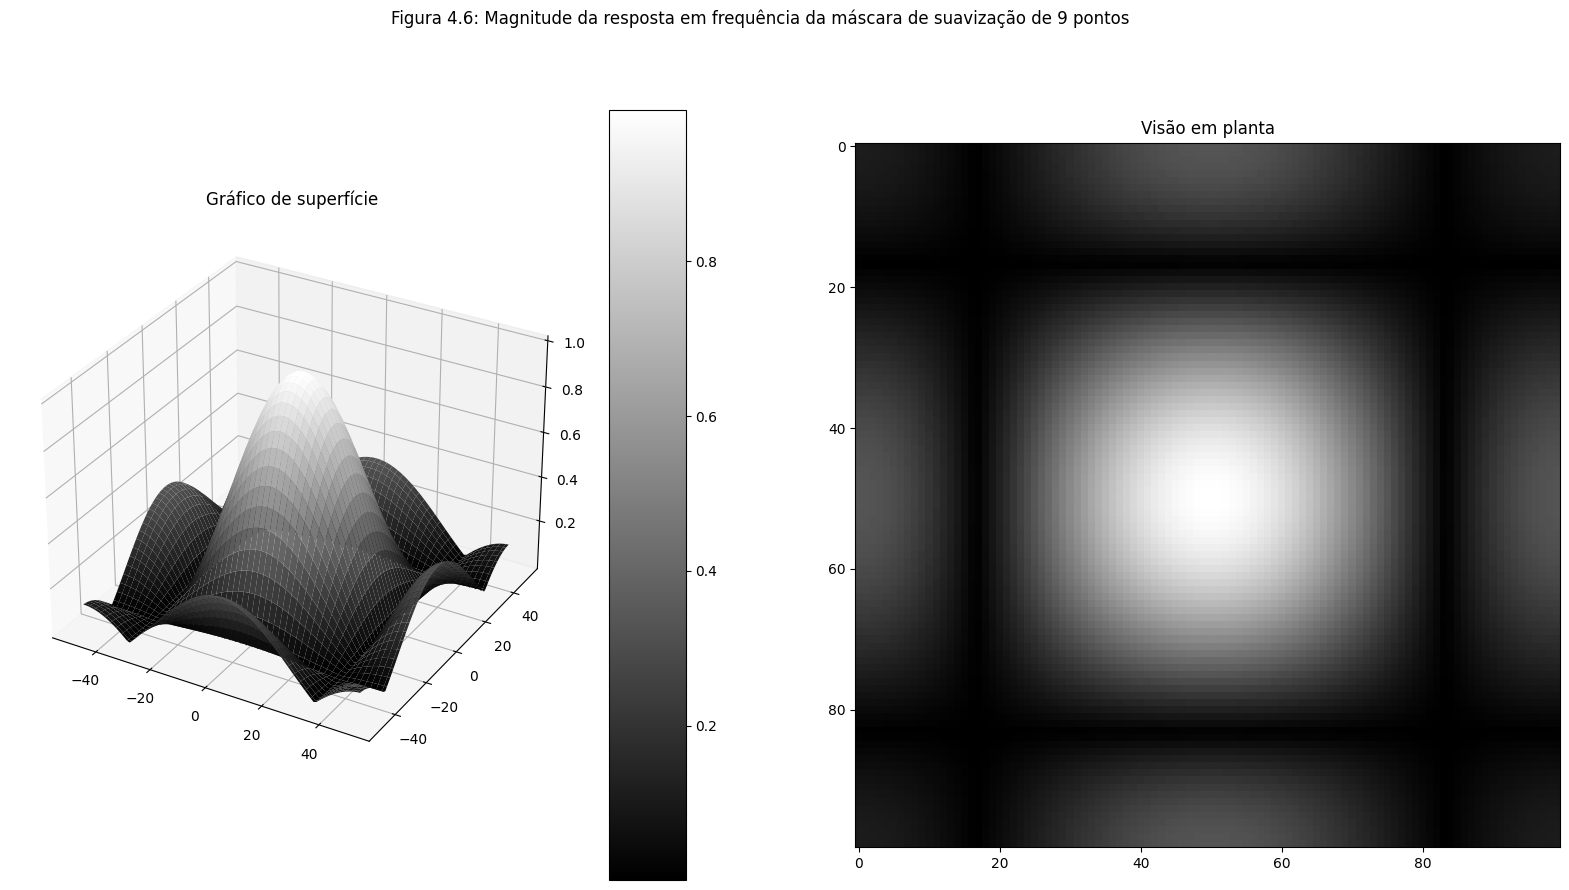

In [3]:
# Imagem 3D
fig = plt.figure(figsize=(20,10));ax = fig.add_subplot(1, 2, 1, projection='3d')
s = ax.plot_surface(x,y,f,cmap='binary_r');ax.set_title("Gráfico de superfície");fig.colorbar(s, shrink=1.0, aspect=10)
# Imagem 2D
ax = fig.add_subplot(1, 2, 2);ax.imshow(abs(np.fft.fftshift(H)),cmap='binary_r');ax.set_title("Visão em planta")
fig.suptitle("Figura 4.6: Magnitude da resposta em frequência da máscara de suavização de 9 pontos")
plt.show()

## Figuras 4.7 e 4.8: Uma imagem "original", uma versão ruidosa, e duas versões filtradas

In [4]:
# função auxiliar
def rgb2gray(rgb):
    fil = [0.299, 0.587, 0.144]
    return np.dot(rgb, fil)

In [5]:
# Carrega a imagem da internet e converte para nível de cinza
url = "http://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg"
M = rgb2gray(imread("double-ferris.jpg")) #rgb2gray(imread(urlopen(url).read()));S=M.shape
fig, ax = plt.subplots(1, 2, figsize=(20,10));ax[0].imshow(M, cmap='gray');
ax[0].set_title("Imagem original");ax[0].axis("off");
Mnoisy = M + 20*(np.random.rand(*S)-0.5);ax[1].imshow(Mnoisy, cmap='gray');
ax[1].set_title("Imagem ruidosa");ax[1].axis("off");plt.show()

/tmp/ipykernel_23479/2582489641.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  M = rgb2gray(imread("double-ferris.jpg")) #rgb2gray(imread(urlopen(url).read()));S=M.shape


FileNotFoundError: No such file: '/home/haruo/bcc2023ii/mac0317/double-ferris.jpg'

### Aplicação da filtragem usando média de 9 pontos na imagem ruidosa

Os códigos a seguir pretendem ilustrar:

- a aplicação do filtro da média de 9 pontos na imagem ruidosa, para evidenciar seu efeito de redução de ruído;

- a aplicação repetida (10x) do mesmo filtro da média, para evidenciar seu efeito de suavização.

Essas aplicações são realizadas tanto no domínio original/espacial quanto no domínio da frequência, utilizando o teorema da convolução:

$$y=h*x \iff y = \text{IDFT}\left(\text{DFT}(h)\circ\text{DFT}(x)\right).$$

Essas implementações produzem **os mesmos resultados**, porém com custos computacionais diferentes:

- a aplicação do filtro no domínio do tempo se beneficia do fato da equação de convolução ter apenas 9 "taps", o que o torna muito mais eficiente do que a aplicação correspondente do filtro no domínio da frequência;

- o tempo da aplicação iterada no domínio do tempo cresce linearmente com o número de iterações, porém no domínio da frequência tal iteração pode ser abreviada pelo acúmulo (exponenciação) dos coeficientes do filtro, de acordo com:

$$Y_{k,l} = \overbrace{H_{k,l}\cdot H_{k,l}\cdots H_{k,l}}^{L\ \text{vezes}}\cdot X_{k,l} = (H_{k,l})^L\cdot X_{k,l}.$$

In [ ]:
# versão 1: calculando as convoluções no domínio do tempo
# Define uma máscara 3x3 contendo apenas os "taps" (coeficientes não-nulos) do filtro
d = np.zeros((3,3))
for j in range(-1,2):
    for k in range(-1,2):
        d[j,k] = 1/9
# O código abaixo faz a filtragem no domínio do tempo.
antes = time.perf_counter()
Mdenoised = sig.convolve2d(Mnoisy,d,mode='same', boundary='wrap')
depois = time.perf_counter()
print("Tempo da filtragem espacial =",depois-antes,"segundos")
# Passa a imagem ruidosa 10 vezes no mesmo filtro.
Mdenoised10 = Mnoisy.copy()
antes = time.perf_counter()
for i in range(10):
    Mdenoised10 = sig.convolve2d(Mdenoised10,d,mode='same', boundary='wrap')
depois = time.perf_counter()
print("Tempo de 10 filtragens espaciais =",depois-antes,"segundos")

In [ ]:
fig , ax = plt.subplots(1, 3, figsize=(20,12))
ax[0].imshow(Mnoisy, cmap='gray');ax[0].set_title("Imagem ruidosa");ax[0].axis("off")
ax[1].imshow(Mdenoised, cmap='gray');ax[1].set_title("Imagem com filtragem espacial");ax[1].axis("off")
ax[2].imshow(Mdenoised10, cmap='gray');ax[2].set_title("Imagem com 10 filtragens espaciais");ax[2].axis("off")
plt.show()

In [ ]:
# versão 2: calculando as convoluções no domínio da frequência
# Define a resposta impulsiva do filtro
h = np.zeros(S)
for j in range(-1,2):
    for k in range(-1,2):
        h[j%S[0],k%S[1]] = 1/9
# O código abaixo faz a filtragem no domínio da frequência.
antes = time.perf_counter()
Mdenoised = np.real(np.fft.ifft2(np.fft.fft2(Mnoisy)*np.fft.fft2(h)))
depois = time.perf_counter()
print("Tempo da filtragem espectral =",depois-antes,"segundos")
# Passa a imagem ruidosa 10 vezes no mesmo filtro.
antes = time.perf_counter()
Mdenoised10 = np.real(np.fft.ifft2(np.fft.fft2(Mnoisy)*np.fft.fft2(h)**10))
depois = time.perf_counter()
print("Tempo de 10 filtragens espectrais =",depois-antes,"segundos")

In [ ]:
fig , ax = plt.subplots(1, 3, figsize=(20,12))
ax[0].imshow(Mnoisy, cmap='gray');ax[0].set_title("Imagem ruidosa");ax[0].axis("off")
ax[1].imshow(Mdenoised, cmap='gray');ax[1].set_title("Imagem com filtragem espectral");ax[1].axis("off")
ax[2].imshow(Mdenoised10, cmap='gray');ax[2].set_title("Imagem com 10 filtragens espectrais");ax[2].axis("off");plt.show()

## Filtro para detecção de bordas

Uma borda de objeto contido em uma imagem $f(x,y)$ corresponde a uma posição onde a cor da imagem varia abruptamente. Por isso, o gradiente $$\nabla f = \begin{pmatrix}
	\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}
\end{pmatrix}$$ pode ser utilizado para detectar bordas quando $\|\nabla f\| \gg 0$.

Da definição de derivada temos:

\begin{align*}
	\frac{\partial f(x,y)}{\partial x} &= \lim\limits_{\partial\rightarrow 0}\frac{f(x+\partial, y)-f(x,y)}{\partial} \\
	\frac{\partial f(x,y)}{\partial y} &= \lim\limits_{\partial\rightarrow 0}\frac{f(x,y+\partial)-f(x,y)}{\partial} \\
\end{align*}
de onde podemos obter aproximações discretas como
\begin{align*}
	\frac{\partial f(x,y)}{\partial x} & \approx \frac{f(x+\Delta_x, y)-f(x,y)}{\Delta_x} \\
	\frac{\partial f(x,y)}{\partial y} & \approx \frac{f(x,y+\Delta_y)-f(x,y)}{\Delta_y}
\end{align*}
onde $\Delta_x$ é a resolução de amostragem horizontal e $\Delta_y$ é a resolução de amostragem vertical.

### Filtros para detecção de bordas horizontais e bordas verticais

As aproximações discretas da derivada sugerem os seguintes filtros convolucionais para detecção de bordas em imagens:

- **bordas horizontais**

$$\begin{array}{l}y_{i,j} = x_{i+1,j}-x_{i,j},\\ \text{ou}\ y=h*x,\\ \text{onde}\ h_{0,0}=-1,\ h_{-1,0}=1,\ h_{r,s}=0, \text{c.c.}\end{array}$$

- **bordas verticais**

$$\begin{array}{l}z_{i,j} = x_{i,j+1}-x_{i,j},\\ \text{ou}\ z=v*x,\\ \text{onde}\ v_{0,0}=-1,\ v_{0,-1}=1,\ v_{r,s}=0, \text{c.c.}\end{array}$$

Um filtro "genérico" para detecção de bordas poderia ser construído combinando as saídas dos detectores de bordas horizontais e verticais, como:

\begin{equation*}
	B_{i,j} = \sqrt{|y_{i,j}|^2 + |z_{i,j}|^2}
\end{equation*}

In [ ]:
v = np.zeros((1,2));v[0,0], v[0,1] = 1, -1;Mver = np.abs(sig.convolve2d(M,v,mode='same', boundary='wrap'));maximo = np.amax(Mver)
fig, ax = plt.subplots(1, 3, figsize=(20,12));ax[0].imshow(M, cmap='gray');ax[0].axis("off")
ax[1].imshow(1-Mver/maximo, cmap='gray_r');ax[1].axis("off")
ax[2].imshow(1-Mver/maximo, cmap='gray');ax[2].axis("off");ax[1].set_title("Filtragem de bordas verticais");plt.show()

In [ ]:
h = np.zeros((2,1));h[0,0], h[1,0] = 1, -1;Mhor = np.abs(sig.convolve2d(M,h,mode='same', boundary='wrap'))
maximo = np.amax(Mhor)
fig, ax = plt.subplots(1, 3, figsize=(20,12));ax[0].imshow(M, cmap='gray');ax[0].axis("off")
ax[1].imshow(1-Mhor/maximo,cmap='gray_r');ax[1].axis("off")
ax[2].imshow(1-Mhor/maximo,cmap='gray');ax[2].axis("off");ax[1].set_title("Filtragem de bordas horizontais");plt.show()

In [ ]:
Mbordas = np.sqrt(Mhor**2+Mver**2);maximo = np.amax(Mbordas)
# bordas combinadas
fig, ax = plt.subplots(1, 3, figsize=(20,12));ax[0].imshow(M, cmap='gray');ax[0].axis("off")
ax[1].imshow(1-Mbordas/maximo, cmap='gray_r');ax[1].axis("off");
ax[2].imshow(1-Mbordas/maximo, cmap='gray');ax[2].axis("off");
ax[1].set_title("Combinação dos resultados da filtragem horizontal e vertical");plt.show()